<a href="https://colab.research.google.com/github/shxvaayy/OASIS-INFOBYTE/blob/main/email_spam_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

# Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd

# Try reading the file with a different encoding, like 'latin-1'
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:

data.shape

(5572, 5)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


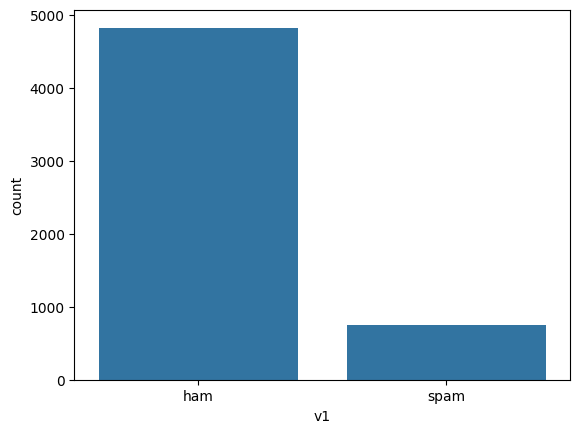

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data, making sure the 'spam' column exists
data = pd.read_csv('spam.csv', encoding='latin-1')

# Verify the column names in your DataFrame
print(data.columns)

# Create the countplot, adjusting the column name if needed
sns.countplot(x='v1', data=data)  # Replace 'v1' with the actual column name for spam if it's different
plt.show()

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


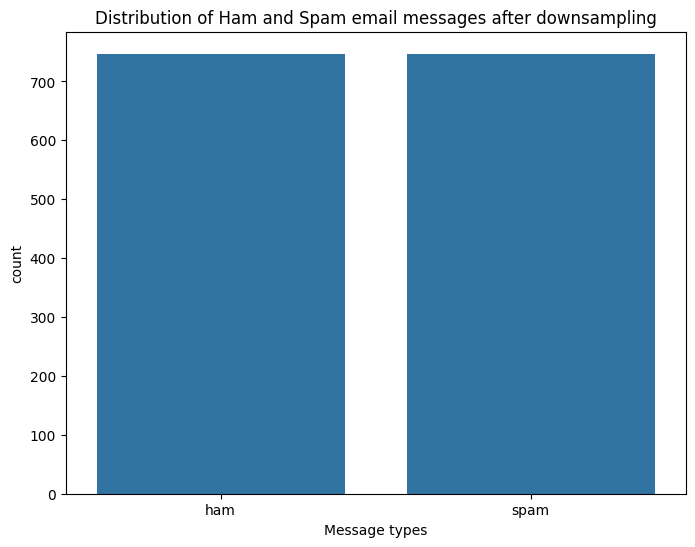

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data, making sure the 'spam' column exists
data = pd.read_csv('spam.csv', encoding='latin-1')

# Check the column names and find the correct one for the spam/ham labels
print(data.columns)  # This will print the columns of your dataframe

# Assuming the correct column name is 'v1', adjust the code as follows:
ham_msg = data[data['v1'] == 'ham']  # Replace 'v1' with the actual column name if needed
spam_msg = data[data['v1'] == 'spam']  # Replace 'v1' with the actual column name if needed
ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)

# Use pd.concat to combine the DataFrames
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)  # Changed from append to concat

plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='v1')  # Replace 'v1' with the actual column name if needed
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')
plt.show()

In [ ]:
# Print the column names to find the correct one for the email text
print(balanced_data.columns)

# Replace 'v2' with the actual name of the column containing the email text
balanced_data['v2'] = balanced_data['v2'].str.replace('Subject', '')  # Assuming 'v2' is the correct column
balanced_data.head()

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"I am late,so call you tomorrow morning.take ca...",NaN,NaN,NaN
1,ham,U r too much close to my heart. If u go away i...,NaN,NaN,NaN
2,ham,Wait &lt;#&gt; min..,NaN,NaN,NaN
3,ham,Can you call me plz. Your number shows out of ...,NaN,NaN,NaN
4,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,NaN,NaN,NaN


In [ ]:
import string

punctuations_list = string.punctuation

def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

# Assuming 'v2' is the correct column name for the email text
balanced_data['v2'] = balanced_data['v2'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,I am lateso call you tomorrow morningtake care...,NaN,NaN,NaN
1,ham,U r too much close to my heart If u go away i ...,NaN,NaN,NaN
2,ham,Wait ltgt min,NaN,NaN,NaN
3,ham,Can you call me plz Your number shows out of c...,NaN,NaN,NaN
4,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,NaN,NaN,NaN


In [ ]:
import string
from nltk.corpus import stopwords # Import the stopwords module

punctuations_list = string.punctuation

def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

# Assuming 'v2' is the correct column name for the email text
balanced_data['v2'] = balanced_data['v2'].apply(lambda x: remove_punctuations(x))

def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


# Create a new 'text' column and apply the remove_stopwords function
balanced_data['text'] = balanced_data['v2'].apply(lambda text: remove_stopwords(text)) # Apply the function to the 'v2' column and store the result in the new 'text' column
balanced_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,text
0,ham,I am lateso call you tomorrow morningtake care...,NaN,NaN,NaN,lateso call tomorrow morningtake care sweet dr...
1,ham,U r too much close to my heart If u go away i ...,NaN,NaN,NaN,u r much close heart u go away shattered plz stay
2,ham,Wait ltgt min,NaN,NaN,NaN,wait ltgt min
3,ham,Can you call me plz Your number shows out of c...,NaN,NaN,NaN,call plz number shows coveragd area urgnt call...
4,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,NaN,NaN,NaN,maybe woke fucking 3 wouldnt problem


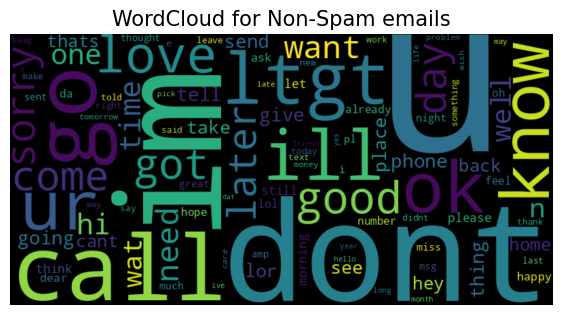

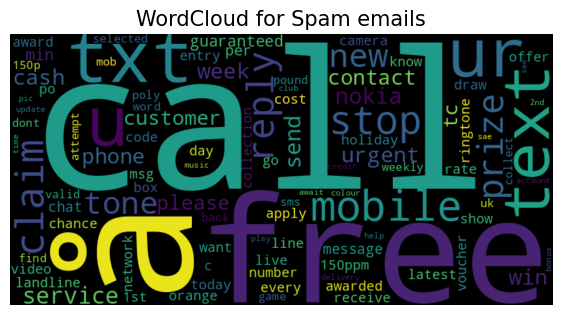

In [ ]:

!pip install wordcloud
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ... (rest of your existing code) ...

def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

# Use 'v1' column to filter the DataFrame, as it contains spam/ham labels
plot_word_cloud(balanced_data[balanced_data['v1'] == 'ham'], typ='Non-Spam') # Changed 'spam' to 'v1' and compared with string 'ham'
plot_word_cloud(balanced_data[balanced_data['v1'] == 'spam'], typ='Spam') # Changed 'spam' to 'v1' and compared with string 'spam'

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
                                                    balanced_data['v1'], # Replace 'spam' with 'v1', assuming 'v1' is the correct column name
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length
max_len = 100  # maximum sequence length
train_sequences = pad_sequences(train_sequences,
                                maxlen=max_len,
                                padding='post',
                                truncating='post')
test_sequences = pad_sequences(test_sequences,
                               maxlen=max_len,
                               padding='post',
                               truncating='post')

In [ ]:

# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32,
                                    input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              optimizer = 'adam')

In [ ]:
es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


In [ ]:
# Convert string labels to numerical labels
train_Y = train_Y.map({'spam': 1, 'ham': 0})
test_Y = test_Y.map({'spam': 1, 'ham': 0})

# Train the model
history = model.fit(train_sequences, train_Y,
                    validation_data=(test_sequences, test_Y),
                    epochs=20,
                    batch_size=32,
                    callbacks = [lr, es]
                )

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4889 - loss: 0.6938 - val_accuracy: 0.4849 - val_loss: 0.6936 - learning_rate: 0.0010
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4525 - loss: 0.6940 - val_accuracy: 0.4849 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4868 - loss: 0.6933 - val_accuracy: 0.4849 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5216 - loss: 0.6930 - val_accuracy: 0.4849 - val_loss: 0.6934 - learning_rate: 0.0010


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5028 - loss: 0.6931
Test Loss : 0.6935521960258484
Test Accuracy : 0.48494982719421387


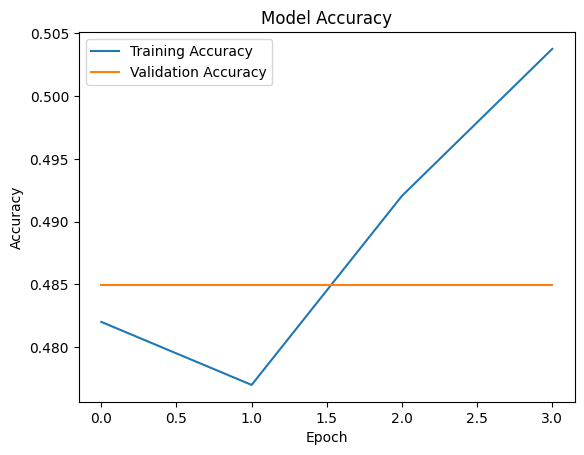

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
